<a href="https://colab.research.google.com/github/tyceaddley/Heart_Failure_Analysis/blob/master/Heart_Failure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
#!pip install bubbly

  Created wheel for bubbly: filename=bubbly-1.0.2-cp36-none-any.whl size=5429 sha256=18984bebf0cc73abe8e0596ea2877ea49aed96b2d51f7971700e01e29b19eaa9
  Stored in directory: /root/.cache/pip/wheels/cf/3c/75/8c09dbf7cd6b320b69a6bc679fd111abd1139866c722b1476b
Successfully built bubbly


In [ ]:
import numpy as np
import pandas as pd
import pandas_profiling

# for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# for advanced visualizations 
import plotly.io as pio
pio.renderers.default = 'colab'
import plotly.offline as py

from plotly.offline import iplot
import plotly.graph_objs as go

from bubbly.bubbly import bubbleplot


In [ ]:
df = pd.read_csv('../content/drive/My Drive/Colab Notebooks/heart_failure_clinical_records_dataset.csv')

In [ ]:
df.head()


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
df.shape
df = df.sort_values('age')
df = df.astype(int)

In [ ]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.829431,0.431438,581.839465,0.418060,38.083612,0.351171,263358.026756,0.979933,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894997,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.098931,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.000000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.000000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.000000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.000000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.000000,148.000000,1.000000,1.00000,285.000000,1.00000


In [ ]:
import warnings
warnings.filterwarnings('ignore')

#generate a fun graph with four of the variables plotted to understand their relationships a little better.
#may or may not provide insight
figure = bubbleplot(dataset= df, x_column = 'creatinine_phosphokinase', y_column = 'platelets',
                    bubble_column = 'sex', time_column = 'age', size_column = 'serum_sodium',
                    color_column = 'sex', x_title = "Creatinine Phosphokinase", y_title = "Platelets",
                    title = "Creatinine Phosphokinase vs Platelet Count vs Age vs Sex",
                    x_logscale = False, scale_bubble = 1, height = 650)

#set iplot so that it shows in colab. settings in 2nd cell
py.iplot(figure, config={'scrollZoom': True})

Text(0.5, 1.0, 'Heatmap for the dataset')

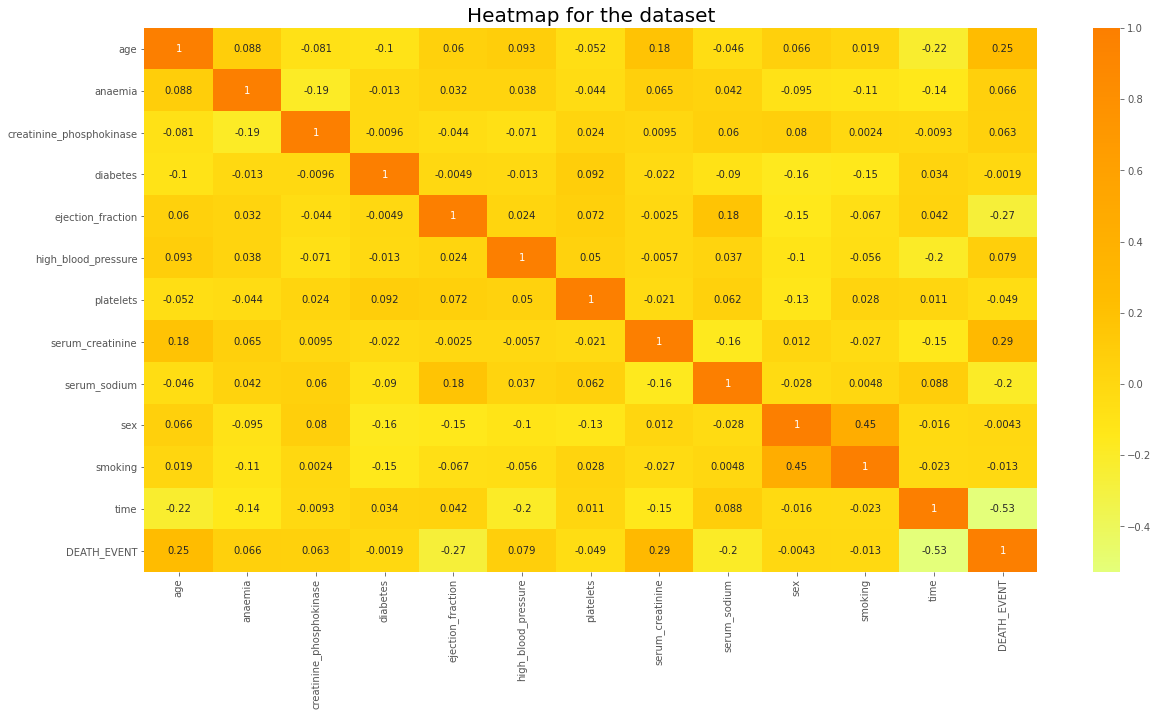

In [ ]:
#use ggplot styling and set size of figure
plt.rcParams['figure.figsize'] = (20,10)
plt.style.use('ggplot')

#show the heatmap and set the style of the figure
sns.heatmap(df.corr(), annot = True, cmap = 'Wistia')
plt.title('Heatmap for the dataset', fontsize = 20)



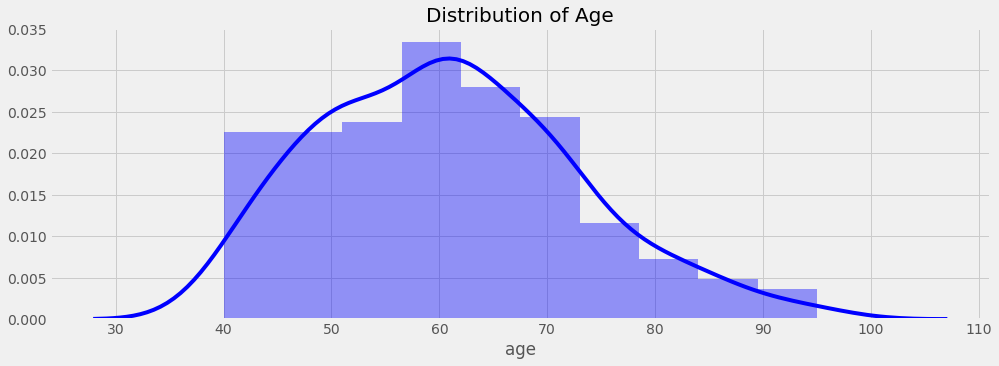

In [ ]:
#show graph of age distribution and the upper/lower tails
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15,5)
sns.distplot(df['age'], color = 'blue')
plt.title('Distribution of Age', fontsize = 20)
plt.show()

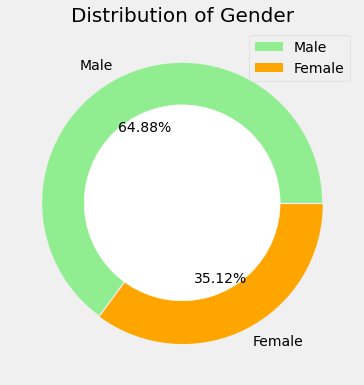

In [ ]:
#set easy params for chart
gen_size = df['sex'].value_counts()
colors = ['lightgreen', 'orange']
labels = "Male", "Female"
explode = [0, 0.01]

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

#visualize the distribution of Male vs Female patients
plt.rcParams['figure.figsize'] = (6,6)
plt.pie(gen_size, colors = colors, labels = labels, shadow = False, explode = explode, autopct = '%.2f%%')
plt.title('Distribution of Gender', fontsize = 20)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.show()

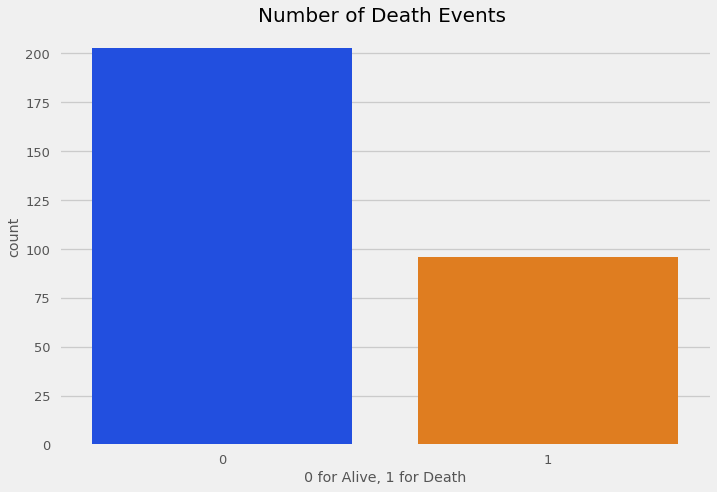

In [ ]:
#how many people died or lived 
plt.rcParams['figure.figsize'] = [10, 6]
plt.style.use('seaborn-talk')
sns.countplot(df['DEATH_EVENT'], palette = 'bright')
plt.xlabel('0 for Alive, 1 for Death')
plt.title('Number of Death Events ', fontsize = 20)
plt.show()

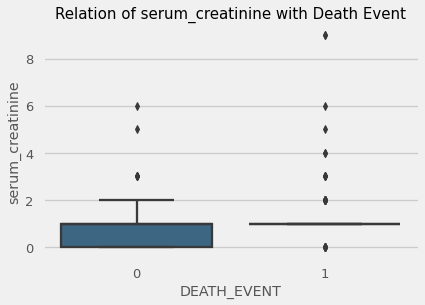

In [ ]:
#serum_creatinine and the correspondence with death event
plt.rcParams['figure.figsize'] = (6,4)
sns.boxplot(df['DEATH_EVENT'], df['serum_creatinine'], palette = 'viridis')
plt.title('Relation of serum_creatinine with Death Event', fontsize = 15)
plt.show()

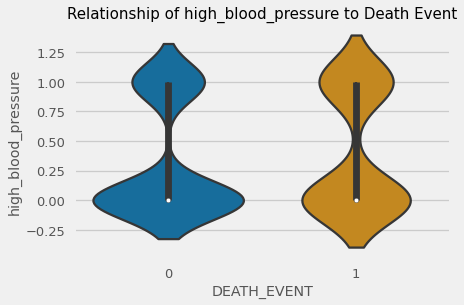

In [ ]:
plt.rcParams['figure.figsize'] = (6,4)
sns.violinplot(df['DEATH_EVENT'], df['high_blood_pressure'], palette = 'colorblind')
plt.title('Relationship of high_blood_pressure to Death Event', fontsize = 15, fontweight = 25)
plt.show()

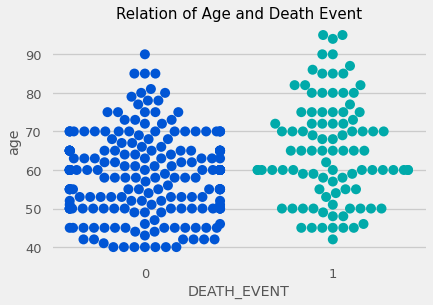

In [ ]:
plt.rcParams['figure.figsize'] = (6,4)
sns.swarmplot(df['DEATH_EVENT'], df['age'], palette = 'winter', size = 10)
plt.title('Relation of Age and Death Event', fontsize = 15, fontweight = 15)
plt.show()

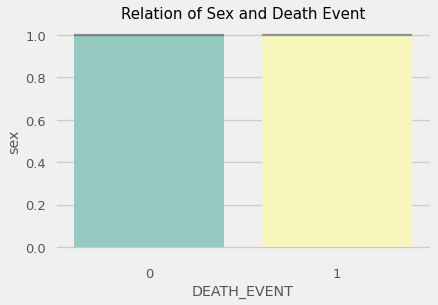

In [ ]:
sns.boxenplot(df['DEATH_EVENT'], df['sex'], palette = 'Set3')
plt.title('Relation of Sex and Death Event', fontsize = 15,  fontweight = 20)
plt.show()

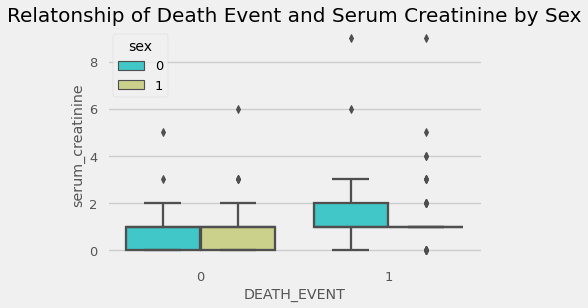

In [ ]:
sns.boxplot(x=df['DEATH_EVENT'], y=df['serum_creatinine'], hue=df['sex'], palette='rainbow')
plt.title('Relatonship of Death Event and Serum Creatinine by Sex', fontsize=20, fontweight = 30)
plt.show()

In [ ]:
#Create 3d scatter plot showing relationship between serum_sodium, creatinine_phosphokinase, and age
trace = go.Scatter3d(
    x=(df['serum_sodium']),
    y=df['creatinine_phosphokinase'],
    z=df['age'],
    name='Marvel',
    mode='markers',
    marker=dict(
        size=10,
        color=df['age']
    )
)

data = [trace]
#set layout for the 3d graph and titles
layout=go.Layout(
    title = 'Serum Sodium vs Creatinine Phosphokinase vs Age',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ),
    scene =dict(
        xaxis =dict(title ='Serum Creatinine'),
        yaxis=dict(title='Creatinine Phosphokinase'),
        zaxis=dict(title='Age')
    )
)
fig =go.Figure(data=data, layout=layout)
py.iplot(fig)

In [ ]:
#taking labels from data and creating target class
y = df['DEATH_EVENT']

df = df.drop('DEATH_EVENT', axis=1)

print("Shape of y:", y.shape)

Shape of y: (299,)


In [ ]:
#one hot encoding of the data 
#drop_first=True, meaning droping the first categories from each attribute. 
df = pd.get_dummies(df, drop_first=True)
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
269,40,0,582,1,35,0,222000,1,132,1,0,244
232,40,1,129,0,35,0,255000,0,137,1,0,209
180,40,0,478,1,30,0,303000,0,136,1,0,148
242,40,0,90,0,35,0,255000,1,136,1,1,212
248,40,0,624,0,35,0,301000,1,142,1,1,214


In [ ]:
x = df

print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (299, 12)
Shape of y: (299,)


In [ ]:
#describe the number of deaths in the data set, death=1
y.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
#create the training and testing sets for machine learning models
x_train, x_test, y_train,  y_test = train_test_split(x,y,test_size =0.2, random_state=1111)

#shape of data
print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (239, 12)
Shape of x_test : (60, 12)
Shape of y_train : (239,)
Shape of y_test : (60,)


Training accuracy : 0.9330543933054394
Testing accuracy : 0.9166666666666666
              precision    recall  f1-score   support

           0       0.96      0.93      0.95        46
           1       0.80      0.86      0.83        14

    accuracy                           0.92        60
   macro avg       0.88      0.90      0.89        60
weighted avg       0.92      0.92      0.92        60



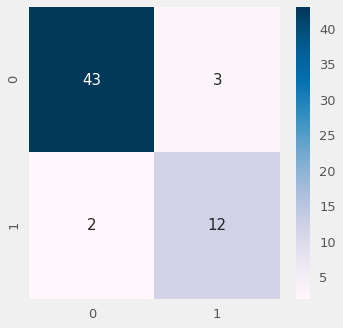

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model = RandomForestClassifier(n_estimators = 50, max_depth = 5)
model.fit(x_train, y_train)
y_predict= model.predict(x_test)
y_pred_quant = model.predict_proba(x_test)[:, 1]
y_pred = model.predict(x_test)

#evaluate how well the model predicts target class:
print('Training accuracy :', model.score(x_train, y_train))
print('Testing accuracy :', model.score(x_test, y_test))

cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5,5)
sns.heatmap(cm, annot=True, annot_kws = {'size':15}, cmap='PuBu')

cr =classification_report(y_test, y_pred)
print(cr)

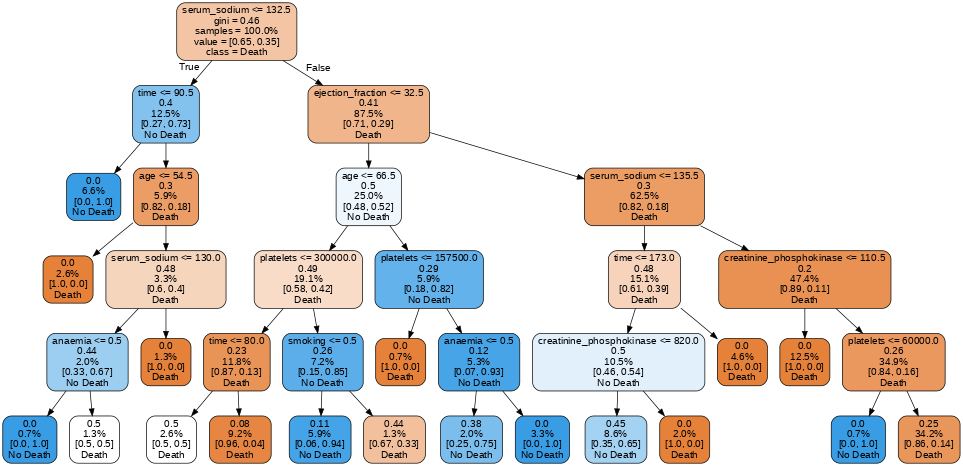

In [ ]:
#show the decision tree arrangement from the randomforestclassifier 
from sklearn.tree import export_graphviz

estimator = model.estimators_[1]
feature_names = [i for i in x_train.columns]

y_train_str = y_train.astype('str')
y_train_str[y_train_str == '0'] = 'No Death'
y_train_str[y_train_str == '1'] = 'Death'
y_train_str = y_train_str.values


export_graphviz(estimator, out_file='tree.dot', 
                feature_names = feature_names,
                class_names = y_train_str,
                rounded = True, proportion = True, 
                label='root',
                precision = 2, filled = True)

from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=50'])

from IPython.display import Image
Image(filename = 'tree.png')

In [ ]:

sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,1]+cm[0,1])
print('Specificity : ', specificity)

Sensitivity :  0.9555555555555556
Specificity :  0.8


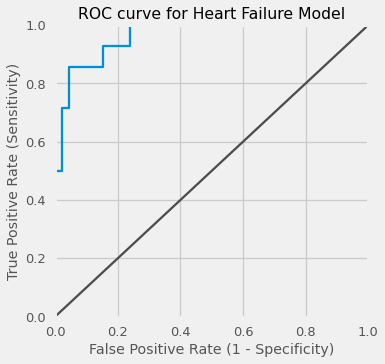

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (3, 5)
plt.title('ROC curve for Heart Failure Model', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [ ]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(model.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [ ]:
n_estimators=[50,800,1500,2500,5000]
max_features=['auto', 'sqrt', 'log2']
max_depth=[10,20,30,40,50]
max_depth.append(None)
min_samples_split=[2,5,10,15,20]
min_samples_leaf=[1,2,5,10,15]

grid_param={'n_estimators':n_estimators,
            'max_features':max_features,
            'max_depth':max_depth,
            'min_samples_split':min_samples_split,
            'min_samples_leaf':min_samples_leaf}

Cells 65 - 74 show a fine tuning of the Hyperparameters for the Random Forest *Classifier*

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
#create new model rfr_random to contain the randomized search algo instead of gridsearch
rfr_random  = RandomizedSearchCV(estimator=model,
                                 param_distributions=grid_param, n_iter = 20,
                                 cv=5, verbose =2, random_state=11,
                                 n_jobs=-1)

In [ ]:
rfr_random.fit(x,y)
print(rfr_random.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.7min


{'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 15, 'max_features': 'sqrt', 'max_depth': 40}


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.9min finished


In [ ]:
#Create a RandomForestClassifier using the new optimized paramaters produced by crossfold validation
rfr_model = RandomForestClassifier(n_estimators=50, min_samples_split=2, min_samples_leaf=15, max_features='sqrt', max_depth=40)
#train new model with improved parameters
rfr_model.fit(x_train, y_train)
y_predict_tune= rfr_model.predict(x_test)
y_pred_quant_tune = rfr_model.predict_proba(x_test)[:, 1]
y_pred_tune = rfr_model.predict(x_test)

In [ ]:
print('Training accuracy :', rfr_model.score(x_train, y_train))
print('Testing accuracy :', rfr_model.score(x_test, y_test))


Training accuracy : 0.8661087866108786
Testing accuracy : 0.8833333333333333


In [ ]:
from sklearn.model_selection import validation_curve

In [ ]:
param_range = np.arange(1,250,2)
train_scores, test_scores = validation_curve(
                                RandomForestClassifier(),
                                X = x_train, y = y_train, 
                                param_name = 'n_estimators', 
                                param_range=param_range,
                                n_jobs=1)

KeyboardInterrupt: ignored

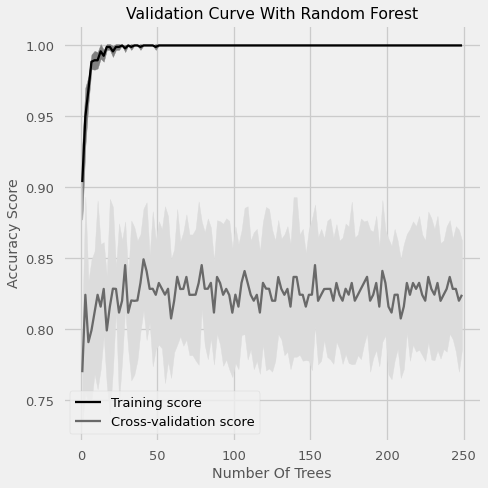

In [ ]:
    # Calculate mean and standard deviation for training set scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    # Calculate mean and standard deviation for test set scores
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot mean accuracy scores for training and test sets
    plt.subplots(1, figsize=(7,7))
    plt.plot(param_range, train_mean, label="Training score", color="black")
    plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

    # Plot accurancy bands for training and test sets
    plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
    plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

    # Create plot    
    plt.title("Validation Curve With Random Forest")
    plt.xlabel("Number Of Trees")
    plt.ylabel("Accuracy Score")
    plt.tight_layout()
    plt.legend(loc="best")
    plt.show()

In [ ]:
# let's check the roc score
from sklearn.metrics import roc_auc_score, auc, roc_curve
print(classification_report(y_test, y_pred_tune))
roc_auc_score(y_test, y_pred_tune)

              precision    recall  f1-score   support

           0       0.93      0.91      0.92        46
           1       0.73      0.79      0.76        14

    accuracy                           0.88        60
   macro avg       0.83      0.85      0.84        60
weighted avg       0.89      0.88      0.88        60



0.8493788819875776

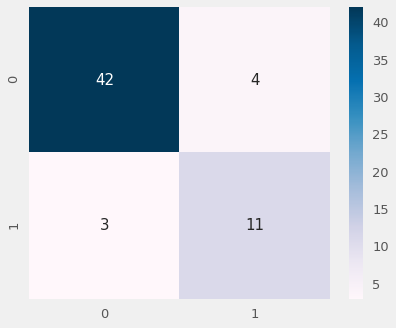

In [ ]:
cm = confusion_matrix(y_test, y_pred_tune)
plt.figure()
plt.rcParams['figure.figsize'] = (6,5)
sns.heatmap(cm, annot=True, annot_kws = {'size':15}, cmap='PuBu')
plt.show()

Cells 75- show the hyperparameter tuning of the K Nearest Neighbors algorithm using Grid Search and Random Search

In [ ]:
#pip install catboost

import xgboost
import lightgbm
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier

In [ ]:
#create a k nearest neighbor attempt to see if better than RF 
kn_clf = KNeighborsClassifier(n_neighbors=10)
kn_clf.fit(x_train, y_train)
kn_pred = kn_clf.predict(x_test)
kn_acc = kn_clf.score(x_test, y_test)
accuracy_list = []
accuracy_list.append(100*kn_acc)

In [ ]:
print( "Accuracy of K Neighbors Classifier is :", "{:.2f}%".format(100*kn_acc))

Accuracy of K Neighbors Classifier is : 78.33%


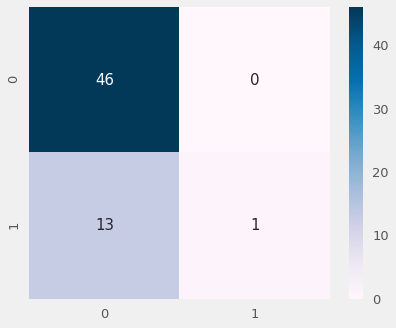

In [ ]:
cm = confusion_matrix(y_test, kn_pred)
plt.figure()
plt.rcParams['figure.figsize'] = (6,5)
sns.heatmap(cm, annot=True, annot_kws = {'size':15}, cmap='PuBu')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
#Gridsearch will be used first
#compare to randomized search later

leaf_size = list(range(1,100))
n_neighbors=list(range(1,100))
p=[1,2]
weights = ['uniform', 'distance']
algorithm = ['ball_tree', 'kd_tree', 'brute', 'auto']

#hyperparameters to be investigated
hyperparameters = {'leaf_size':leaf_size, 'n_neighbors':n_neighbors,
                   'p':p}

knn_2 = KNeighborsClassifier()
clf = GridSearchCV(knn_2, hyperparameters, verbose=2, cv=5, n_jobs=-1)

In [ ]:
best_model = clf.fit(x,y)
#Print The value of best Hyperparameters
print(best_model.best_params_)

Fitting 5 folds for each of 19602 candidates, totalling 98010 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 186 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 2122 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done 5370 tasks      | elapsed:   36.3s
[Parallel(n_jobs=-1)]: Done 9898 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 15738 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 22858 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 31290 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 41002 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 52026 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 64330 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 77946 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 92842 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 98010 out of 98010 | elapsed:  9.7min finished


{'leaf_size': 1, 'n_neighbors': 26, 'p': 1}


In [ ]:
#new model optimization using the randomized search
hyperparameters = {'leaf_size':leaf_size, 'n_neighbors':n_neighbors,
                   'p':p, 'weights':weights, 'algorithm':algorithm}

knn_rando = RandomizedSearchCV(estimator=knn_2,
                                 param_distributions=hyperparameters, n_iter = 250,
                                 cv=5, verbose =2, random_state=11,
                                 n_jobs=-1)

In [ ]:
#fit randomized search to the data
knn_rando.fit(x,y)
print(knn_rando.best_params_)

Fitting 5 folds for each of 250 candidates, totalling 1250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 186 tasks      | elapsed:    2.7s


{'weights': 'uniform', 'p': 1, 'n_neighbors': 51, 'leaf_size': 55, 'algorithm': 'ball_tree'}


[Parallel(n_jobs=-1)]: Done 1250 out of 1250 | elapsed:    8.8s finished


In [ ]:
#results from gridsearch optimization
kn_clf_tune = KNeighborsClassifier(n_neighbors=26, weights='uniform', leaf_size=1, p=1, algorithm='ball_tree')
kn_clf_tune.fit(x_train, y_train)
kn_pred_tune = kn_clf_tune.predict(x_test)
kn_acc_tune = kn_clf_tune.score(x_test, y_test)
accuracy_list = []
accuracy_list.append(100*kn_acc_tune)

print(classification_report(y_test, kn_pred_tune))
roc_auc_score(y_test, kn_pred_tune)

              precision    recall  f1-score   support

           0       0.77      1.00      0.87        46
           1       0.00      0.00      0.00        14

    accuracy                           0.77        60
   macro avg       0.38      0.50      0.43        60
weighted avg       0.59      0.77      0.67        60



0.5

In [ ]:
#randomized search optimization model results
kn_clf_tune = KNeighborsClassifier(n_neighbors=51, weights='uniform', leaf_size=55, p=1, algorithm='ball_tree')
kn_clf_tune.fit(x_train, y_train)
kn_pred_tune = kn_clf_tune.predict(x_test)
kn_acc_tune = kn_clf_tune.score(x_test, y_test)
accuracy_list = []
accuracy_list.append(100*kn_acc_tune)

print(classification_report(y_test, kn_pred_tune))
roc_auc_score(y_test, kn_pred_tune)

              precision    recall  f1-score   support

           0       0.77      1.00      0.87        46
           1       0.00      0.00      0.00        14

    accuracy                           0.77        60
   macro avg       0.38      0.50      0.43        60
weighted avg       0.59      0.77      0.67        60



0.5

In [ ]:
#Gradient boosting classification

gradientboost_clf = GradientBoostingClassifier(max_depth=2, random_state=1111)
gradientboost_clf.fit(x_train, y_train)
gradientboost_pred = gradientboost_clf.predict(x_test)
gradientboost_acc = gradientboost_clf.score(x_test, y_test)
accuracy_list.append(100*gradientboost_acc)

In [ ]:
print( "Accuracy of Gradient Boosting is :", "{:.2f}%".format(100* gradientboost_acc))

Accuracy of Gradient Boosting is : 86.67%


In [ ]:
fp_rate, tp_rate, thresholds = roc_curve(y_test, gradientboost_pred)
roc_auc = auc(fp_rate, tp_rate)
print(classification_report(y_test, gradientboost_pred))
roc_auc

              precision    recall  f1-score   support

           0       0.95      0.87      0.91        46
           1       0.67      0.86      0.75        14

    accuracy                           0.87        60
   macro avg       0.81      0.86      0.83        60
weighted avg       0.89      0.87      0.87        60



0.8633540372670807

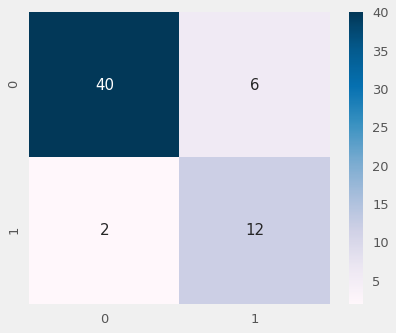

In [ ]:
cm = confusion_matrix(y_test, gradientboost_pred)
plt.figure()
plt.rcParams['figure.figsize'] = (6,5)
sns.heatmap(cm, annot=True, annot_kws = {'size':15}, cmap='PuBu')
plt.show()

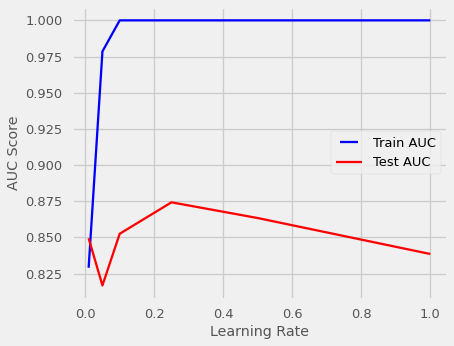

In [ ]:
learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]

train_results = []
test_results = []

for eta in learning_rates:
   model = GradientBoostingClassifier(learning_rate=eta)
   model.fit(x_train, y_train)
   train_pred = model.predict(x_train)
   
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)

   y_pred = model.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(learning_rates, train_results, 'b', label="Train AUC")
line2, = plt.plot(learning_rates, test_results, 'r', label="Test AUC")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC Score')
plt.xlabel('Learning Rate')
plt.show()

In [ ]:
gbc = GradientBoostingClassifier()

hyperparameter_gbc = {'n_estimators':n_estimators, 'min_samples_split':min_samples_split, 
                   'max_depth':max_depth, 'max_features':max_features}

gbc_rando = RandomizedSearchCV(estimator=gbc,
                                 param_distributions=hyperparameter_gbc, n_iter = 250,
                                 cv=5, verbose =2, random_state=11,
                                 n_jobs=-1)

In [ ]:
gbc_rando.fit(x,y)
print(gbc_rando.best_params_)

Fitting 5 folds for each of 250 candidates, totalling 1250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   39.2s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 1250 out of 1250 | elapsed: 15.7min finished


{'n_estimators': 2500, 'min_samples_split': 2, 'max_features': 'sqrt', 'max_depth': 10}


In [ ]:
gradientboost_clf = GradientBoostingClassifier(max_depth=10, min_samples_split=2, n_estimators=2500,max_features='sqrt', random_state=1111)
gradientboost_clf.fit(x_train, y_train)
gradientboost_pred = gradientboost_clf.predict(x_test)
gradientboost_acc = gradientboost_clf.score(x_test, y_test)
accuracy_list.append(100*gradientboost_acc)

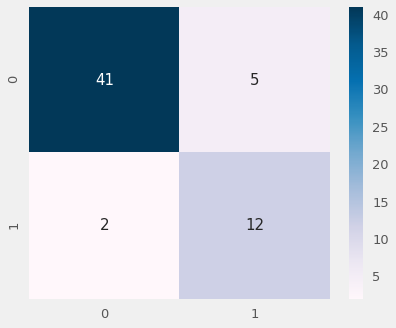

In [ ]:
cm = confusion_matrix(y_test, gradientboost_pred)
plt.figure()
plt.rcParams['figure.figsize'] = (6,5)
sns.heatmap(cm, annot=True, annot_kws = {'size':15}, cmap='PuBu')
plt.show()

In [ ]:
fp_rate, tp_rate, thresholds = roc_curve(y_test, gradientboost_pred)
roc_auc = auc(fp_rate, tp_rate)
print(classification_report(y_test, gradientboost_pred))
roc_auc

              precision    recall  f1-score   support

           0       0.95      0.89      0.92        46
           1       0.71      0.86      0.77        14

    accuracy                           0.88        60
   macro avg       0.83      0.87      0.85        60
weighted avg       0.90      0.88      0.89        60



0.8742236024844721

In [ ]:
#xgbrf classification, this is xg boosted Random Forest

xgb_clf = xgboost.XGBRFClassifier(max_depth=3, random_state=0)
xgb_clf.fit(x_train,y_train)
xgb_pred = xgb_clf.predict(x_test)
xgb_acc = xgb_clf.score(x_test,y_test)
accuracy_list.append(100*xgb_acc)

In [ ]:
print( "Accuracy of XGBRFClassifier is :", "{:.2f}%".format(100* xgb_acc))

Accuracy of XGBRFClassifier is : 88.33%


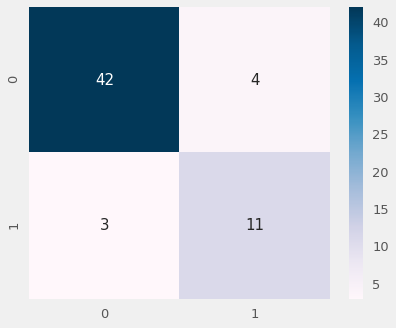

In [ ]:
cm = confusion_matrix(y_test, xgb_pred)
plt.figure()
plt.rcParams['figure.figsize'] = (6,5)
sns.heatmap(cm, annot=True, annot_kws = {'size':15}, cmap='PuBu')
plt.show()

In [ ]:
# CatBoostClassifier

cat_clf = CatBoostClassifier()
cat_clf.fit(x_train,y_train)
cat_pred = cat_clf.predict(x_test)
cat_acc = cat_clf.score(x_test,y_test)
accuracy_list.append(100*cat_acc)

Learning rate set to 0.005591
0:	learn: 0.6887235	total: 51.3ms	remaining: 51.3s
1:	learn: 0.6843578	total: 53.2ms	remaining: 26.5s
2:	learn: 0.6798455	total: 54.8ms	remaining: 18.2s
3:	learn: 0.6751345	total: 56.8ms	remaining: 14.1s
4:	learn: 0.6713623	total: 58.3ms	remaining: 11.6s
5:	learn: 0.6669980	total: 59.9ms	remaining: 9.92s
6:	learn: 0.6638476	total: 61.3ms	remaining: 8.7s
7:	learn: 0.6604939	total: 62.7ms	remaining: 7.78s
8:	learn: 0.6571354	total: 64.1ms	remaining: 7.05s
9:	learn: 0.6540495	total: 65.5ms	remaining: 6.49s
10:	learn: 0.6515670	total: 67ms	remaining: 6.02s
11:	learn: 0.6481055	total: 68.3ms	remaining: 5.63s
12:	learn: 0.6445900	total: 69.6ms	remaining: 5.29s
13:	learn: 0.6414698	total: 71.9ms	remaining: 5.06s
14:	learn: 0.6369450	total: 73.3ms	remaining: 4.81s
15:	learn: 0.6339194	total: 74.6ms	remaining: 4.59s
16:	learn: 0.6310159	total: 76ms	remaining: 4.39s
17:	learn: 0.6275810	total: 77.3ms	remaining: 4.22s
18:	learn: 0.6248146	total: 78.6ms	remaining: 4.0

In [101]:
print( "Accuracy of CatBoostClassifier is :","{:.2f}%".format(100* cat_acc))

Accuracy of CatBoostClassifier is : 88.33%


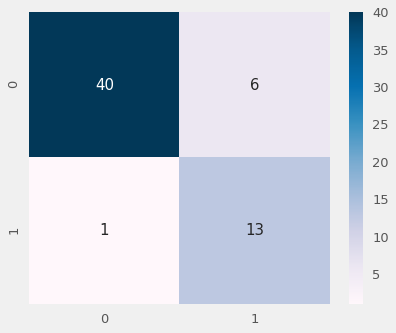

In [100]:
cm = confusion_matrix(y_test, cat_pred)
plt.figure()
plt.rcParams['figure.figsize'] = (6,5)
sns.heatmap(cm, annot=True, annot_kws = {'size':15}, cmap='PuBu')
plt.show()